# 4章 ニューラルネットの学習

## 4.2 損失関数

### 4.2.1 2乗誤差

In [1]:
function meansquarederror(y::Vector, t::Vector)
    0.5 * sum((y-t).^2)
end

meansquarederror (generic function with 1 method)

In [2]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

10-element Array{Int64,1}:
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0

In [3]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
meansquarederror(y, t)

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
meansquarederror(y, t)

0.5974999999999999

### 4.2.2 交差エントロピー誤差

In [5]:
using LinearAlgebra
function crossentropyerror(y::Vector, t::Vector)
    δ = 1e-7
    -(t ⋅ log.(y .+ δ))
end

crossentropyerror (generic function with 1 method)

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

10-element Array{Int64,1}:
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
crossentropyerror(y, t)

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
crossentropyerror(y, t)

2.302584092994546

## 4.3 数値微分

### 4.3.1 微分

In [9]:
function numericaldiff(f, x)
    h = 1e-4 # 0.0001
    (f(x+h) - f(x-h)) / 2h
end

numericaldiff (generic function with 1 method)

### 4.3.2 数値微分の例

In [10]:
function_1(x) = 0.01x.^2 + 0.1x

function_1 (generic function with 1 method)

In [11]:
using PyPlot

In [12]:
x = 0.0:0.1:20.0

0.0:0.1:20.0

In [13]:
y = function_1(x);

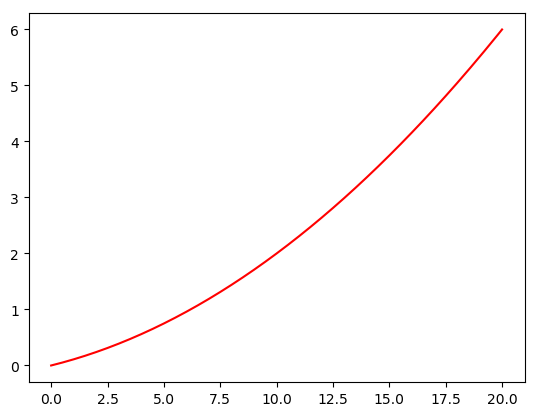

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002B674320>

In [14]:
plot(x, y, "r-")

In [15]:
numericaldiff(function_1, 5)

0.1999999999990898

In [16]:
numericaldiff(function_1, 10)

0.2999999999986347

In [17]:
function tangent_line(f, x)
    d = numericaldiff(f, x)
    y = f(x) - d * x
    return t -> d * t .+ y
end

tangent_line (generic function with 1 method)

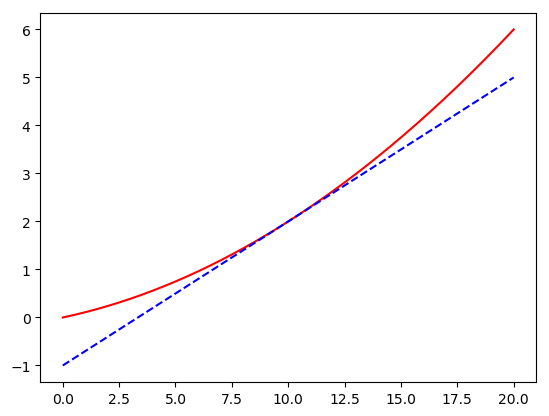

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FA8E550>

In [18]:
x0 = 10.0
function_1t = tangent_line(function_1, x0)
xseq = 0.0:0.1:20.0
y1 = function_1(xseq);
y2 = function_1t(xseq);
plot(xseq, y1, "r-")
plot(xseq, y2, "b--")

### 4.3.3 偏微分

In [19]:
function partial_diff(f, x1, x2)
    (numericaldiff(x->f(x, x2), x1), numericaldiff(x->f(x1, x), x2))
end

partial_diff (generic function with 1 method)

In [20]:
function_2(x1, x2) = x1.^2 + x2.^2

function_2 (generic function with 1 method)

In [21]:
partial_diff(function_2, 3.0, 4.0)

(6.00000000000378, 7.999999999999119)

## 4.4 勾配

In [22]:
function numerical_gradient(f, x::Vector)
    h = 1e-4 # 0.0001
    # (f(x+h) - f(x-h)) / 2h
    map(1:length(x)) do idx
        tmp_val = x[idx]
        # f(x+h)
        x[idx] += h
        fxh1 = f(x)
        # f(x-h)
        x[idx] -= 2h
        fxh2 = f(x)
        # restore
        x[idx] = tmp_val
        (fxh1 - fxh2) / 2h
    end
end

numerical_gradient (generic function with 1 method)

In [23]:
function numerical_gradient(f, x::AbstractArray{T,N}) where {T,N}
    h = 1e-4 # 0.0001
    # (f(x+h) - f(x-h)) / 2h
    reshape(map(1:length(x)) do idx
        tmp_val = x[idx]
        # f(x+h)
        x[idx] += h
        fxh1 = f(x)
        # f(x-h)
        x[idx] -= 2h
        fxh2 = f(x)
        # restore
        x[idx] = tmp_val
        (fxh1 - fxh2) / 2h
    end, size(x))
end

numerical_gradient (generic function with 2 methods)

In [24]:
function_2(x::Vector) = x ⋅ x

function_2 (generic function with 2 methods)

In [25]:
numerical_gradient(function_2, [3.0, 4.0])

2-element Array{Float64,1}:
 5.9999999999860165
 7.999999999999119 

In [26]:
numerical_gradient(function_2, [0.0, 2.0])

2-element Array{Float64,1}:
 0.0               
 3.9999999999995595

In [27]:
numerical_gradient(function_2, [3.0, 0.0])

2-element Array{Float64,1}:
 5.999999999994898
 0.0              

### 4.4.1 勾配法

In [29]:
function gradient_descent(f, init_x; lr=0.01, step_num=100)
    x = init_x
    
    for i = 1:step_num
        grad = numerical_gradient(f, x)
        x -= lr * grad
    end
    
    x
end

gradient_descent (generic function with 1 method)

In [30]:
init_x = [-3.0, 4.0]
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

2-element Array{Float64,1}:
 -6.111107929002627e-10
  8.148143905330748e-10

In [31]:
init_x = [-3.0, 4.0]
gradient_descent(function_2, init_x, lr=10.0, step_num=100)

2-element Array{Float64,1}:
 9.453764611121996e11
 2.56007253831004e13 

In [32]:
init_x = [-3.0, 4.0]
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

2-element Array{Float64,1}:
 -2.999999939999995 
  3.9999999199999934

### 4.4.2 ニューラルネットワークに対する勾配

In [33]:
# from Chapter3
function softmax(a::AbstractVector{T}) where {T<:AbstractFloat}
    c = maximum(a)  # オーバーフロー対策
    exp_a = exp.(a .- c)
    sum_exp_a = sum(exp_a)
    exp_a ./ sum_exp_a
end

function softmax(a::AbstractMatrix{T}) where {T<:AbstractFloat}
    mapslices(softmax, a, 1)
end

softmax (generic function with 2 methods)

In [34]:
struct SimpleNet{T<:AbstractFloat}
    W::AbstractMatrix{T}
    # SimpleNet{T}() = new(randn(T, 3, 2))
end

In [35]:
(::Type{SimpleNet{T}})() where {T} = SimpleNet(randn(T, 3, 2))

In [36]:
function predict(net::SimpleNet{T}, x) where {T}
    net.W * x
end

predict (generic function with 1 method)

In [37]:
function loss(net::SimpleNet{T}, x, t) where {T}
    z = predict(net, x)
    y = softmax(z)
    crossentropyerror(y, t)
end

loss (generic function with 1 method)

In [38]:
net = SimpleNet{Float64}()

SimpleNet{Float64}([-1.13282 0.174243; -0.108454 -1.54813; 1.01141 -1.07495])

In [39]:
x = [0.6, 0.9]

2-element Array{Float64,1}:
 0.6
 0.9

In [40]:
p = predict(net, x)

3-element Array{Float64,1}:
 -0.522875570237826 
 -1.4583913016102084
 -0.3606048291842927

In [41]:
findmax(p)

(-0.3606048291842927, 3)

In [42]:
t = [0, 0, 1]

3-element Array{Int64,1}:
 0
 0
 1

In [43]:
loss(net, x, t)

0.7810752836508313

In [44]:
f(W) = loss(SimpleNet(W), x, t)
dW = numerical_gradient(f, net.W)

3×2 Array{Float64,2}:
  0.233594    0.350391
  0.0916583   0.137487
 -0.325252   -0.487878

※↑書籍に載っているサンプルを参照等価性とか色々気をつけて丁寧に書き直したもの。  
　↓でも動作するが、「オブジェクト内部の配列を外部から修正し処理させる」という感じの副作用を期待したコードで分かりにくくバグの温床。  

In [45]:
f0(W) = loss(net, x, t)
dW = numerical_gradient(f0, net.W)

3×2 Array{Float64,2}:
  0.233594    0.350391
  0.0916583   0.137487
 -0.325252   -0.487878